<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [22]:
# Classics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Base
from collections import Counter
import re
import os

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD

# Vector Representations
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier

from sklearn.pipeline import Pipeline

In [2]:

yelp = pd.read_json('./data/review_sample.json', lines=True)

In [3]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [9]:
'''
def tokenize(doc):
    
    tokens = []

    """ Update those tokens w/o stopwords"""
    for doc in tokenizer.pipe(doc, batch_size=500):

        doc_tokens = []

        for token in doc:
            if (token.is_stop == False) & (token.is_punct == False):
                doc_tokens.append(token.text.lower())

        tokens.append(doc_tokens)
    return tokens

yelp['tokens'] = tokenize(yelp['text'])
'''

In [4]:
def tokenize(document):
    
    doc = nlp(document)
    
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True)]
    
   

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [5]:
# Instantiate vectorizer object
vect = TfidfVectorizer(tokenizer=tokenize, min_df=0.025, max_df=.98, ngram_range=(1,2))

# Create a vocabulary and get word counts per document
dtm = vect.fit_transform(yelp['text']) # Similiar to fit_predict

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,,definitely,food,get,good,great,order,service,$,1,...,well,wife,will,wine,wish,wonderful,work,worth,wrong,year
0,0.298116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.146361,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.144534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.189226,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.108898
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.389432,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.127462,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [6]:
from sklearn.neighbors import NearestNeighbors

nn  = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=10, p=2, radius=1.0)

In [7]:
sample_review = ["Good food but the price is high"]

In [8]:
new_review = vect.transform(sample_review)
a, position = nn.kneighbors(new_review.todense())

In [12]:
# Indices for the most similar reviews
position

array([[1271, 1938, 8241, 1975, 8597,  331, 3070, 2581, 3520, 4839]])

In [9]:
print(new_review)

  (0, 235)	0.5088193640103474
  (0, 146)	0.7080292072938865
  (0, 131)	0.3274473956276216
  (0, 118)	0.36410946090919394


In [10]:
# 10 most similiar reviews
similar_reviews = [yelp['text'][n] for n in position]
print(similar_reviews)

[1271    Not happy with this gym or la fitness in gener...
1938    Tremendous food with great taste and variety. ...
8241    Food was pretty good, service was friendly and...
1975    The room was so damp and humid and had a musty...
8597    The quality of the food here has really declin...
331     Have been going there since high school yeah i...
3070    Definitely recommended. Food was very good as ...
2581    The dealership promotes themselves as one that...
3520    Dr. Liaw is very thorough with her exam. She i...
4839    Une superbe sélection de bières de microbrasse...
Name: text, dtype: object]


## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [13]:
x_train = yelp['text']
y_train = yelp['stars']

In [23]:
svd = TruncatedSVD(algorithm='randomized', n_iter=150, random_state=42)
vect2 = TfidfVectorizer(stop_words='english')
pipe_lsi = Pipeline([('vect', vect2), ('svd', svd)])
clf = SGDClassifier(n_iter=1500, random_state=42)

pipe_SGDClassifier = Pipeline([('lsi', pipe_lsi), ('clf', clf)])

In [29]:
parameters = {
    'lsi__svd__n_components': (50,100),
    'lsi__vect__max_features': (150,500),
}

grid_search_SGDClassifier = GridSearchCV(pipe_SGDClassifier,parameters, cv=5, n_jobs=-1, verbose=1)
grid_search_SGDClassifier.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.9min finished
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('lsi', Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=...dom_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'lsi__svd__n_components': (50, 100), 'lsi__vect__max_features': (150, 500)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [ ]:
grid_search_SGDClassifier.best_params_

In [33]:
print('Prediction Star for the New Review: ',grid_search_SGDClassifier.predict(sample_review)[0])

Prediction Star for the New Review:  3


## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Keep the `iterations` parameter at or below 5 to reduce run time
    - The `workers` parameter should match the number of physical cores on your machine.
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [39]:

import gensim
import os
import re

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

import pandas as pd

In [41]:
STOPWORDS = set(STOPWORDS).union(set(['great','taste','bad','good','food', 'restaurant']))

def tokenize_new(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

yelp['tokens_new'] = yelp['text'].apply(tokenize_new)

Learn the vocubalary of the yelp data:

In [44]:
id2word = corpora.Dictionary(yelp['tokens_new'])


In [45]:
len(id2word.keys())

26469

In [46]:
# Let's remove extreme values from the dataset
id2word.filter_extremes(no_below=10, no_above=0.90)

In [47]:
len(id2word.keys())

4776

Create a bag of words representation of the entire corpus

In [49]:
# a bag of words(bow) representation of our corpus
corpus = [id2word.doc2bow(text) for text in yelp['tokens_new']]

Your LDA model should be ready for estimation: 

In [50]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=5,
                   workers=4,
                   num_topics = 10 # You can change this parameter
                  )

Create 1-2 visualizations of the results

In [51]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]
topics = [' '.join(t[0:5]) for t in words]


In [53]:
for id, t in enumerate(topics): 
    print(f"Topic {id}:")
    print(t, end="\n")

Topic 0:
time like place service ve
Topic 1:
place like time service nice
Topic 2:
place like time service best
Topic 3:
place like service time love
Topic 4:
place service like time try
Topic 5:
service place time got like
Topic 6:
place like service time ve
Topic 7:
service place like little time
Topic 8:
place time service like got
Topic 9:
place time like service got


In [55]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

pyLDAvis.gensim.prepare(lda, corpus, id2word)

//anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.002988  0.003830       1        1  10.194345
5      0.003877  0.005394       2        1  10.189909
2     -0.003867 -0.001353       3        1  10.131322
3      0.000162 -0.001293       4        1  10.070795
4      0.002979 -0.003467       5        1  10.021783
6      0.001843 -0.001371       6        1   9.962132
0     -0.001240 -0.002034       7        1   9.912025
9      0.001922  0.001257       8        1   9.857605
1     -0.004211  0.000890       9        1   9.830347
7      0.001525 -0.001852      10        1   9.829735, topic_info=     Category         Freq         Term        Total  loglift  logprob
41    Default  3645.000000      service  3645.000000  30.0000  30.0000
121   Default  4747.000000        place  4747.000000  29.0000  29.0000
31    Default  3439.000000         time  3439.000000  28.0000  28.0000
173   Default  1367.000000      amazing  1367.000000  27.0000  27.0000
1033  Default  1396.000000      chicken  1396.000000  26.0000  26.0000
333   Default  1434.000000       little  1434.000000  25.0000  25.0000
82    Default  1761.000000         nice  1761.000000  24.0000  24.0000
34    Default  1505.000000         came  1505.000000  23.0000  23.0000
633   Default  1652.000000         love  1652.000000  22.0000  22.0000
67    Default  2068.000000          got  2068.000000  21.0000  21.0000
27    Default  1214.000000         said  1214.000000  20.0000  20.0000
36    Default  1394.000000     friendly  1394.000000  19.0000  19.0000
307   Default  1456.000000         come  1456.000000  18.0000  18.0000
22    Default   915.000000      minutes   915.000000  17.0000  17.0000
469   Default   946.000000         work   946.000000  16.0000  16.0000
461   Default   972.000000         told   972.000000  15.0000  15.0000
338   Default  1508.000000        order  1508.000000  14.0000  14.0000
313   Default  1451.000000   definitely  1451.000000  13.0000  13.0000
165   Default  1168.000000    recommend  1168.000000  12.0000  12.0000
119   Default  1440.000000       people  1440.000000  11.0000  11.0000
110   Default  1822.000000         best  1822.000000  10.0000  10.0000
1040  Default   806.000000          lot   806.000000   9.0000   9.0000
1023  Default  1549.000000      ordered  1549.000000   8.0000   8.0000
589   Default   670.000000    excellent   670.000000   7.0000   7.0000
105   Default  1493.000000         went  1493.000000   6.0000   6.0000
104   Default   916.000000        vegas   916.000000   5.0000   5.0000
45    Default   757.000000         area   757.000000   4.0000   4.0000
162   Default  1243.000000         menu  1243.000000   3.0000   3.0000
33    Default   978.000000         wait   978.000000   2.0000   2.0000
375   Default  1161.000000       better  1161.000000   1.0000   1.0000
...       ...          ...          ...          ...      ...      ...
92    Topic10    48.143471  restaurants   349.407318   0.3377  -6.7284
234   Topic10    65.085457      getting   496.474548   0.2879  -6.4269
539   Topic10    97.661110         wasn   789.765381   0.2295  -6.0211
640   Topic10    62.134804    selection   478.180420   0.2791  -6.4733
15    Topic10   346.887421         like  3472.402588   0.0162  -4.7536
30    Topic10    96.808304        small   804.584229   0.2022  -6.0299
110   Topic10   193.925354         best  1822.659668   0.0792  -5.3351
82    Topic10   187.540894         nice  1761.635742   0.0798  -5.3686
124   Topic10   118.859375          bar  1025.815308   0.1645  -5.8247
67    Topic10   211.557449          got  2068.614990   0.0396  -5.2481
686   Topic10    73.981422         free   591.780701   0.2404  -6.2988
469   Topic10   107.026299         work   946.240295   0.1403  -5.9295
121   Topic10   372.788574        place  4747.876465  -0.2247  -4.6816
103   Topic10   178.174622           ve  1939.049561  -0.0674  -5.4198
84    Topic10   106.355362        night   9

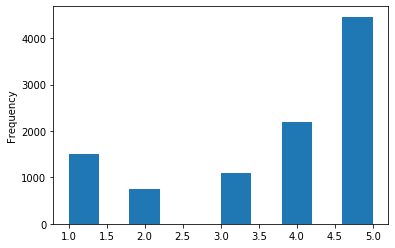

In [56]:
yelp['stars'].plot(kind='hist');

In [57]:
from collections import Counter
def count(docs):

    # Remember, shops['tokens'] has something like this
    # 0    [ , 11/25/2016, 1, check-in, Love, love, loved...
    # 1    [ , 12/2/2016, Listed, in, Date, Night:, Austi...
    # 2    [ , 11/30/2016, 1, check-in, Listed, in, Brunc...
    
        word_counts = Counter()
        appears_in = Counter()
        
        #length of dataframe 
        total_docs = len(docs) 

        #For each row in df['tokens']
        for doc in docs:
            
            word_counts.update(doc)
            appears_in.update(set(doc))
            #Sets are unordered.Set elements are unique. Duplicate elements are not allowed.
            #A set itself may be modified, but the elements contained in the set must be of an immutable type.

        #temp : zip asigna a key to each value
        #keys are the words and values the number of times a word appears
        temp = zip(word_counts.keys(), word_counts.values())
       
        #Create a data frame called wc with two columns word and count 
        wc = pd.DataFrame(temp, columns = ['word', 'count'])
        
        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        #cumsum() Return the cumulative sum of the elements along a given axis
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [59]:
# Use the Function
wc = count(yelp['tokens_new'])

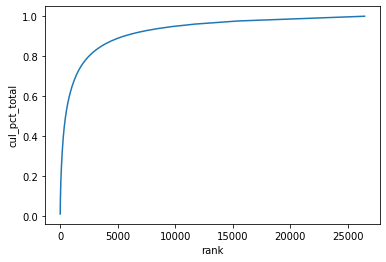

In [60]:
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

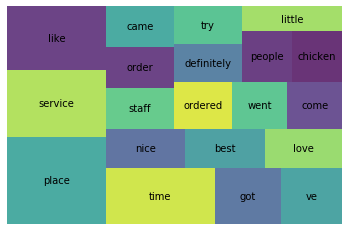

In [62]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

##### Based in the graph(gensim) above, we can say that people use adjectives like amazing, nice, love, friendly, best and excellent to refer their experiences, this means that the majority of the reviews are positive than negative (as we can see in the histogram and heatmap)

##### Additionally, analizing the heatmap,  we can say that people make more reviews about the place than about the service.

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)